In [16]:
import os

import pandas as pd
import matplotlib.pyplot as plt

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import pandas as pd
from tensorflow.keras.layers import Dense, Input  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore


In [17]:
data = pd.read_parquet("../data/tickers/ADA/ADA-day_1-raw.parquet")
data.head()

features            best_bid_price                         best_bid_qty  \
attributes                    Open    High     Low   Close         Open   
event_time                                                                
2024-05-16 00:00:00         0.4524  0.4524  0.4524  0.4524       1590.0   
2024-05-16 00:00:01         0.4524  0.4524  0.4524  0.4524        921.0   
2024-05-16 00:00:02         0.4524  0.4524  0.4524  0.4524       1181.0   
2024-05-16 00:00:03         0.4524  0.4524  0.4524  0.4524        525.0   
2024-05-16 00:00:04         0.4524  0.4524  0.4524  0.4524        506.0   

features                                    best_ask_price          ...  \
attributes             High     Low   Close           Open    High  ...   
event_time                                                          ...   
2024-05-16 00:00:00  1599.0   902.0   911.0         0.4525  0.4525  ...   
2024-05-16 00:00:01  1531.0   921.0  1180.0         0.4525  0.4525  ...   
2024-05-16 00:00:02  1181.0  1095.0  1095.0         0.4525  0.4525  ...   
2024-05-16 00:00:03   885.0   507.0   507.0         0.4525  0.4525  ...   
2024-05-16 00:00:04   508.0   505.0   508.0         0.4525  0.4525  ...   

features                    best_ask_qty                         mid_price  \
attributes            Close         Open    High     Low   Close      Open   
event_time                                                                   
2024-05-16 00:00:00  0.4525       1075.0  1075.0  1053.0  1074.0   0.45245   
2024-05-16 00:00:01  0.4525       1074.0  1074.0  1074.0  1074.0   0.45245   
2024-05-16 00:00:02  0.4525       1074.0  1074.0  1074.0  1074.0   0.45245   
2024-05-16 00:00:03  0.4525       1074.0  1239.0  1074.0  1239.0   0.45245   
2024-05-16 00:00:04  0.4525       1239.0  1240.0  1231.0  1231.0   0.45245   

features                                       Trades  
attributes              High      Low    Close         
event_time                                             
2024-05-16 00:00:00  0.45245  0.45245  0.45245     28  
2024-05-16 00:00:01  0.45245  0.45245  0.45245     23  
2024-05-16 00:00:02  0.45245  0.45245  0.45245      5  
2024-05-16 00:00:03  0.45245  0.45245  0.45245      8  
2024-05-16 00:00:04  0.45245  0.45245  0.45245      5  

[5 rows x 21 columns]

In [18]:
X_train = pd.concat([
    data["best_bid_price"]["Open"],
    data["best_bid_price"]["High"],
    data["best_bid_price"]["Low"],
    data["best_bid_price"]["Close"],
    data["best_bid_qty"]["Open"],
    data["best_bid_qty"]["High"],
    data["best_bid_qty"]["Low"],
    data["best_bid_qty"]["Close"],
    data["best_ask_price"]["Open"],
    data["best_ask_price"]["High"],
    data["best_ask_price"]["Low"],
    data["best_ask_price"]["Close"],
    data["best_ask_qty"]["Open"],
    data["best_ask_qty"]["High"],
    data["best_ask_qty"]["Low"],
    data["best_ask_qty"]["Close"],
    data["Trades"]], 
    axis=1)

y_train = pd.concat([
    data["mid_price"]["Open"],
    data["mid_price"]["High"],
    data["mid_price"]["Low"],
    data["mid_price"]["Close"]],
    axis=1)

In [19]:
X_train.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,Low,Close,Open,High,Low,Close,Trades
event_time,,,,,,,,,,,,,,,,,
2024-05-16 00:00:00,0.4524,0.4524,0.4524,0.4524,1590.0,1599.0,902.0,911.0,0.4525,0.4525,0.4525,0.4525,1075.0,1075.0,1053.0,1074.0,28
2024-05-16 00:00:01,0.4524,0.4524,0.4524,0.4524,921.0,1531.0,921.0,1180.0,0.4525,0.4525,0.4525,0.4525,1074.0,1074.0,1074.0,1074.0,23
2024-05-16 00:00:02,0.4524,0.4524,0.4524,0.4524,1181.0,1181.0,1095.0,1095.0,0.4525,0.4525,0.4525,0.4525,1074.0,1074.0,1074.0,1074.0,5
2024-05-16 00:00:03,0.4524,0.4524,0.4524,0.4524,525.0,885.0,507.0,507.0,0.4525,0.4525,0.4525,0.4525,1074.0,1239.0,1074.0,1239.0,8
2024-05-16 00:00:04,0.4524,0.4524,0.4524,0.4524,506.0,508.0,505.0,508.0,0.4525,0.4525,0.4525,0.4525,1239.0,1240.0,1231.0,1231.0,5


In [20]:
y_train.head()

,Open,High,Low,Close
event_time,,,,
2024-05-16 00:00:00,0.45245,0.45245,0.45245,0.45245
2024-05-16 00:00:01,0.45245,0.45245,0.45245,0.45245
2024-05-16 00:00:02,0.45245,0.45245,0.45245,0.45245
2024-05-16 00:00:03,0.45245,0.45245,0.45245,0.45245
2024-05-16 00:00:04,0.45245,0.45245,0.45245,0.45245


In [21]:
model = Sequential()

model.add(Input(shape=(17, )))
model.add(Dense(512, activation="elu"))
model.add(Dense(512, activation="elu"))
model.add(Dense(32, activation="elu"))
model.add(Dense(4))

model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"]
)

In [22]:
history = model.fit(
            X_train,
            y_train,
            epochs=10,
            batch_size=256,
            verbose=1,
            validation_split=0.2,
        )

Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4641.3979 - mean_squared_error: 4641.3979 - val_loss: 3.3033 - val_mean_squared_error: 3.3033
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2076 - mean_squared_error: 3.2076 - val_loss: 2.8998 - val_mean_squared_error: 2.8998
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7850 - mean_squared_error: 2.7850 - val_loss: 2.4359 - val_mean_squared_error: 2.4359
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3175 - mean_squared_error: 2.3175 - val_loss: 1.9693 - val_mean_squared_error: 1.9693
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8576 - mean_squared_error: 1.8576 - val_loss: 1.5364 - val_mean_squared_error: 1.5364
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4375 - mean_squared_error: 1.4375 - val_loss: 1.1581 - val_mean_squared_error: 1.1581
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0749 - mean_squared_error: 1.0749 - val_loss

In [23]:
X_test = pd.read_parquet("../data/tickers/ADA/ADA-day_2-raw.parquet")
X_test.head()

features            best_bid_price                         best_bid_qty  \
attributes                    Open    High     Low   Close         Open   
event_time                                                                
2024-05-17 00:00:00         0.4595  0.4595  0.4595  0.4595       1398.0   
2024-05-17 00:00:01         0.4595  0.4595  0.4595  0.4595       1416.0   
2024-05-17 00:00:02         0.4595  0.4595  0.4595  0.4595       1985.0   
2024-05-17 00:00:03         0.4595  0.4595  0.4595  0.4595       2152.0   
2024-05-17 00:00:04         0.4595  0.4596  0.4595  0.4596       1709.0   

features                                    best_ask_price          ...  \
attributes             High     Low   Close           Open    High  ...   
event_time                                                          ...   
2024-05-17 00:00:00  1407.0  1398.0  1407.0         0.4596  0.4596  ...   
2024-05-17 00:00:01  2075.0  1415.0  2075.0         0.4596  0.4596  ...   
2024-05-17 00:00:02  2073.0  1985.0  2073.0         0.4596  0.4596  ...   
2024-05-17 00:00:03  2152.0  1530.0  1710.0         0.4596  0.4596  ...   
2024-05-17 00:00:04  1711.0   236.0  1466.0         0.4596  0.4597  ...   

features                    best_ask_qty                        mid_price  \
attributes            Close         Open    High    Low   Close      Open   
event_time                                                                  
2024-05-17 00:00:00  0.4596        529.0   529.0  131.0   131.0   0.45955   
2024-05-17 00:00:01  0.4596        131.0   191.0  131.0   191.0   0.45955   
2024-05-17 00:00:02  0.4596        191.0   192.0  191.0   192.0   0.45955   
2024-05-17 00:00:03  0.4596        192.0   316.0  132.0   192.0   0.45955   
2024-05-17 00:00:04  0.4597        192.0  1672.0  132.0  1160.0   0.45955   

features                                       Trades  
attributes              High      Low    Close         
event_time                                             
2024-05-17 00:00:00  0.45955  0.45955  0.45955      5  
2024-05-17 00:00:01  0.45955  0.45955  0.45955      7  
2024-05-17 00:00:02  0.45955  0.45955  0.45955      3  
2024-05-17 00:00:03  0.45955  0.45955  0.45955     14  
2024-05-17 00:00:04  0.45965  0.45955  0.45965     19  

[5 rows x 21 columns]

In [24]:
X_test.drop(columns=["mid_price"], inplace=True)
X_test.head()

C:\Users\luisa\AppData\Local\Temp\ipykernel_75756\770054663.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test.drop(columns=["mid_price"], inplace=True)


features            best_bid_price                         best_bid_qty  \
attributes                    Open    High     Low   Close         Open   
event_time                                                                
2024-05-17 00:00:00         0.4595  0.4595  0.4595  0.4595       1398.0   
2024-05-17 00:00:01         0.4595  0.4595  0.4595  0.4595       1416.0   
2024-05-17 00:00:02         0.4595  0.4595  0.4595  0.4595       1985.0   
2024-05-17 00:00:03         0.4595  0.4595  0.4595  0.4595       2152.0   
2024-05-17 00:00:04         0.4595  0.4596  0.4595  0.4596       1709.0   

features                                    best_ask_price                  \
attributes             High     Low   Close           Open    High     Low   
event_time                                                                   
2024-05-17 00:00:00  1407.0  1398.0  1407.0         0.4596  0.4596  0.4596   
2024-05-17 00:00:01  2075.0  1415.0  2075.0         0.4596  0.4596  0.4596   
2024-05-17 00:00:02  2073.0  1985.0  2073.0         0.4596  0.4596  0.4596   
2024-05-17 00:00:03  2152.0  1530.0  1710.0         0.4596  0.4596  0.4596   
2024-05-17 00:00:04  1711.0   236.0  1466.0         0.4596  0.4597  0.4596   

features                    best_ask_qty                        Trades  
attributes            Close         Open    High    Low   Close         
event_time                                                              
2024-05-17 00:00:00  0.4596        529.0   529.0  131.0   131.0      5  
2024-05-17 00:00:01  0.4596        131.0   191.0  131.0   191.0      7  
2024-05-17 00:00:02  0.4596        191.0   192.0  191.0   192.0      3  
2024-05-17 00:00:03  0.4596        192.0   316.0  132.0   192.0     14  
2024-05-17 00:00:04  0.4597        192.0  1672.0  132.0  1160.0     19

In [25]:
y_pred = model.predict(X_test)

2341/2341 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
y_pred = pd.DataFrame(y_pred, columns=["Open", "High", "Low", "Close"])
y_pred.head()

,Open,High,Low,Close
0,0.272255,-0.003614,0.424063,1.041175
1,0.272255,-0.003614,0.424063,1.041175
2,0.272255,-0.003614,0.424063,1.041175
3,0.272255,-0.003614,0.424063,1.041175
4,0.272255,-0.003614,0.424063,1.041175


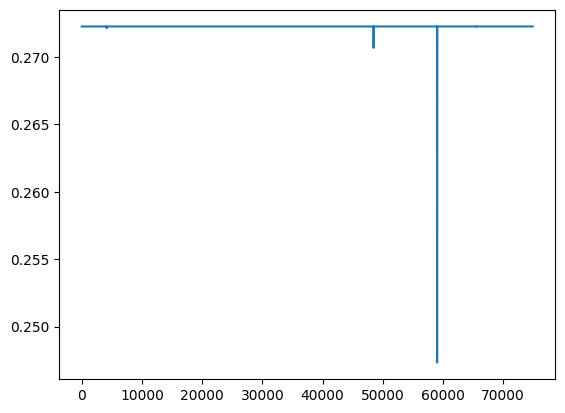

In [ ]:
plt.plot(y_pred["Open"], label="Open")